In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import sklearn.cross_validation as cv
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

%matplotlib inline 

data = pd.read_csv("winequality-red.csv", sep=";")
X= data.drop(columns = "quality")
y = data["quality"]


### Linear Regression

In [51]:
from sklearn import linear_model as lm
linear_model = lm.LinearRegression(fit_intercept=True)
X_train, X_test , Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=1)
model= linear_model.fit(X_train, Y_train)
coefficients_array = np.append(model.coef_, model.intercept_)
indices = np.append(X.columns,"intercept")
coefficients = pd.DataFrame(coefficients_array,index = indices).rename(columns = {0: "coefficients"})
coefficients 

,coefficients
fixed acidity,0.041707
volatile acidity,-1.166689
citric acid,-0.256508
residual sugar,0.017982
chlorides,-1.787663
free sulfur dioxide,0.004928
total sulfur dioxide,-0.003552
density,-35.453247
pH,-0.385019
sulphates,0.883716


In [33]:
def rmse(actual_y, predicted_y):
    return np.sqrt(1/len(actual_y)*sum((actual_y - predicted_y)**2))

Y_pred = model.predict(X_test)
test_error = rmse(Y_test, Y_pred)
test_error

0.6572203924250966

Text(0, 0.5, 'Predictions')

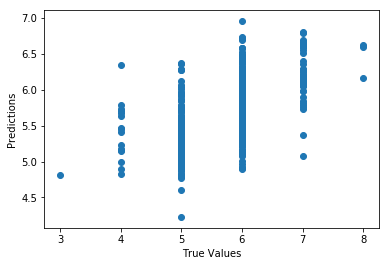

In [15]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

#### Cross validated Linear Regression

In [49]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)
kf.get_n_splits(X)

validation_errors = []
model_coefs = []
model_intercept = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model= lm.LinearRegression(fit_intercept=True).fit(X_train, y_train)
    model_coefs.append(model.coef_)
    model_intercept.append(model.intercept_)
    error = rmse(y_test, model.predict(X_test))
    validation_errors.append(error)

validation_errors

[0.6673739812195301,
 0.672442195301064,
 0.6666188867693412,
 0.6397351162109024,
 0.6572203924250966]

In [50]:
#The one that has the minimum error is the 4th in the list.
coefficients_array = np.append(model_coefs[3], model_intercept[3])
indices = np.append(X.columns,"intercept")
coefficients = pd.DataFrame(coefficients_array,index = indices).rename(columns = {0: "coefficients"})
coefficients 

,coefficients
fixed acidity,0.036814
volatile acidity,-1.065918
citric acid,-0.187500
residual sugar,0.026213
chlorides,-1.706800
free sulfur dioxide,0.005202
total sulfur dioxide,-0.003621
density,-21.916688
pH,-0.257803
sulphates,0.866497
